In [1]:
%load_ext autoreload
%autoreload 2

Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked
Spiked


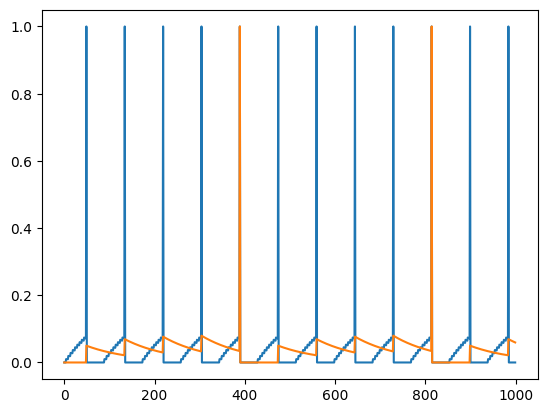

In [43]:

class Neuron:
    def __init__(self, theta=0.08, refactory=0.01) -> None:
        self.theta = theta # activation threshold
        self.v = 0
        self.synapses = []
        self.refactory = refactory
        self._lats_fire = 0
        self._ready_to_fire = 0 # if <= 0, then can fire
    
    def update(self, dt, v, decay=0.1):
        spiked = False 
        
        if self._ready_to_fire == self.refactory:
            self.v = 0 # zero out the potential after firing
        
        self.v *= 1 - decay
        
        self._ready_to_fire -= dt
        if self._ready_to_fire <= 0: # accept input if not refactoring
            self.v += v
            
        if self.v >= self.theta:
            spiked = True
            self._ready_to_fire = self.refactory
            self.v = 1 # spike
            
            for synapse in self.synapses:
                synapse.target.update(dt=dt, v=1*synapse.strength)
        return spiked
        
        
        
    
    def add_synapse(self, synapse):
        self.synapses.append(synapse)


class Synapse:
    def __init__(self, target, strength=0.05) -> None:
        self.target = target
        self.strength = strength
        

inp = Neuron(refactory=0.04)
out = Neuron()

inp.add_synapse(Synapse(out))


dt = 1e-3
v = 0.01; decay=0.01; t = 0; T = 1; i = 0
records = []
while t < T:
    i += 1
    t += dt
    if i % 5 == 0:
        spiked = inp.update(dt, v, decay)
        if not spiked: 
            out.update(dt, 0, decay)
        else: print("Spiked")
    else: 
        inp.update(dt, 0, decay)
        out.update(dt, 0, decay)
    
    records.append({"inp": inp.v, "out": out.v})
    
import matplotlib.pyplot as plt
data_inp = [d['inp'] for d in records]
data_out = [d['out'] for d in records]
plt.plot(data_inp)
plt.plot(data_out)
plt.show()